# EDA Take Home Challenge

A popular take home assignment for data analyst positions involves exploratory data analysis or EDA.  You are given a dataset or three and told to analyze the data.  Where to even start?  Here we work through an exploratory analysis.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default plotting parameters
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('talk')

Read in the data plus basic easy questions.  How much data do I have?  Are there missing values?  What are the data types?

In [3]:
# read in worker data
worker_df = pd.read_csv('data/workers.csv')
print(worker_df.shape)
worker_df.head()

(5000, 5)


,Worker ID,Worker Name,Hire Date,Worker Status,Team
0,1000,Paul Clark,2020-09-12,Part Time,SeaGreen
1,1001,Andrea White,2001-11-08,Full Time,Crimson
2,1002,Daniel Taylor,2002-06-10,Part Time,LightSteelBlue
3,1003,Ann Manning,2019-09-13,Per Diem,Crimson
4,1004,Brenda Gonzales,2000-12-23,Part Time,Crimson


In [4]:
# check number of unique values in the dataset
for i in list(worker_df.columns):
    print(f'Unique {i}: {worker_df[i].nunique()}')

Unique Worker ID: 5000
Unique Worker Name: 4820
Unique Hire Date: 4028
Unique Worker Status: 3
Unique Team: 4


In [5]:
# checking for null values
worker_df.isnull().sum()

Worker ID        0
Worker Name      0
Hire Date        0
Worker Status    0
Team             0
dtype: int64

In [6]:
# statistics about numerical data
### 'Worker ID' is the only numerical column  - this column is an identity column according to the readme
worker_df.describe()

,Worker ID
count,5000.000000
mean,3499.500000
std,1443.520003
min,1000.000000
25%,2249.750000
50%,3499.500000
75%,4749.250000
max,5999.000000


In [7]:
# checking column types
###### 'Hire Date' column isn't a date - we'll need to fix 
worker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Worker ID      5000 non-null   int64 
 1   Worker Name    5000 non-null   object
 2   Hire Date      5000 non-null   object
 3   Worker Status  5000 non-null   object
 4   Team           5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [8]:
# convert 'Hire Date' to datetime
worker_df['Hire Date'] = pd.to_datetime(worker_df['Hire Date'])

# check that it worked
print(worker_df.info())

# check date range of dataset
print(f"Min Date: {worker_df['Hire Date'].min()}")
print(f"Max Date: {worker_df['Hire Date'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Worker ID      5000 non-null   int64         
 1   Worker Name    5000 non-null   object        
 2   Hire Date      5000 non-null   datetime64[ns]
 3   Worker Status  5000 non-null   object        
 4   Team           5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 195.4+ KB
None
Min Date: 1991-07-11 00:00:00
Max Date: 2021-07-08 00:00:00


In [9]:
# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

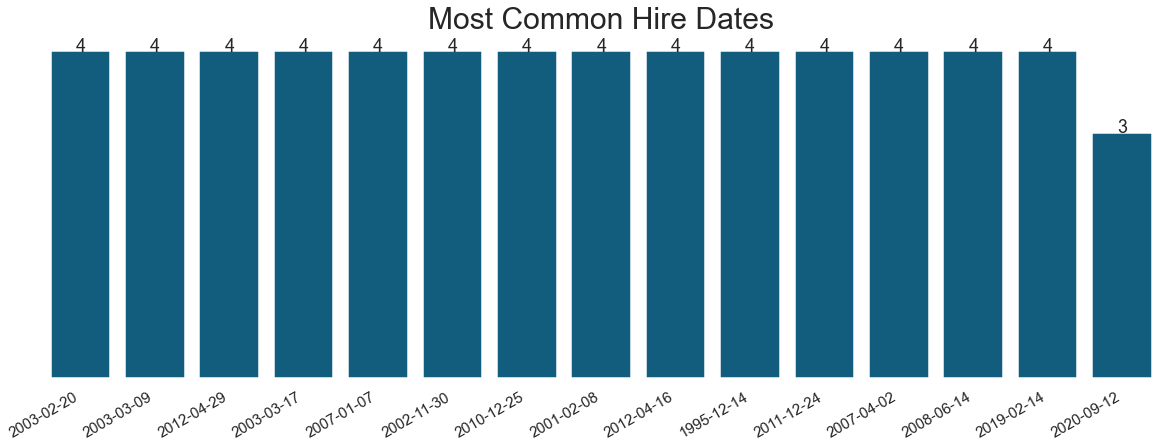

In [10]:
# visualize hire date
# first Count all unique dates
hire_dates = Counter(worker_df['Hire Date'].dt.date)

# get dates and date counts
common_dates = [d[0] for d in hire_dates.most_common(15)]
common_counts = [d[1] for d in hire_dates.most_common(15)]

# plot 20 most common hire dates
fig, ax = plt.subplots()
g = sns.barplot(common_dates, common_counts, palette=['#00638f'])
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Most Common Hire Dates', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.autofmt_xdate()
plt.show()

After each plot I like to use a markdown cell to remark on any key observations that can be drawn.  Even if these observations are simple, creating a short meaningful caption can help your EDA look complete and well thought out.  

I also try to give each vizualization a desriptive title and to use a consistent color palette throughout the notebook.

The greatest number of workers hired on any one date is four.  We can speculate that workers are hired individually and not in cohorts.


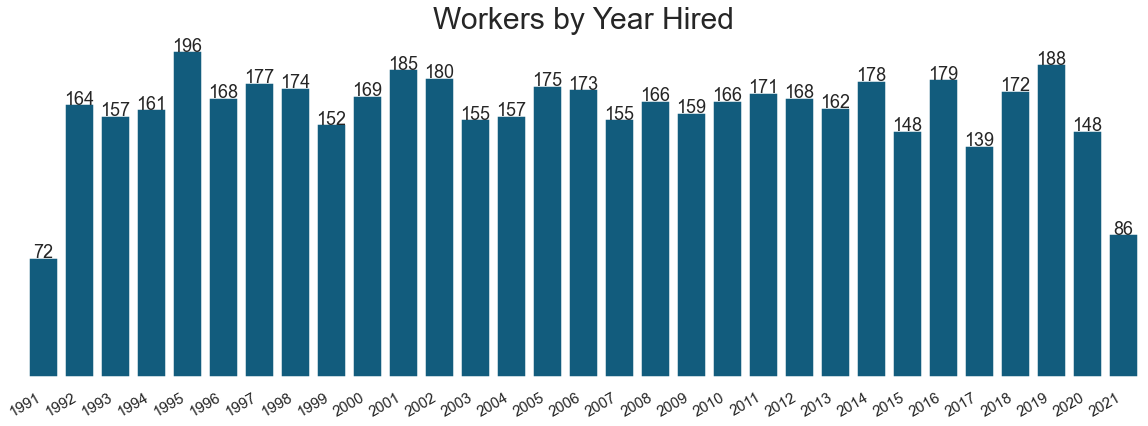

In [11]:
# visualize hire date
# first Count all unique dates
hire_dates = Counter(worker_df['Hire Date'].dt.year)

# get dates and date counts
common_dates = [d[0] for d in hire_dates.most_common()]
common_counts = [d[1] for d in hire_dates.most_common()]

# plot 20 most common hire dates
fig, ax = plt.subplots()
g = sns.barplot(common_dates, common_counts, color='#00638f') # first color in the colorblind palette
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Workers by Year Hired', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.autofmt_xdate()
plt.show()

Here we can see workers hired by year.  We see that the years with the least number of hires are the first and last years of the dataset.  Above, when we checked the date range of the data, we found the minimum date to be 1991-07-11 and the maximum date 2021-07-08.

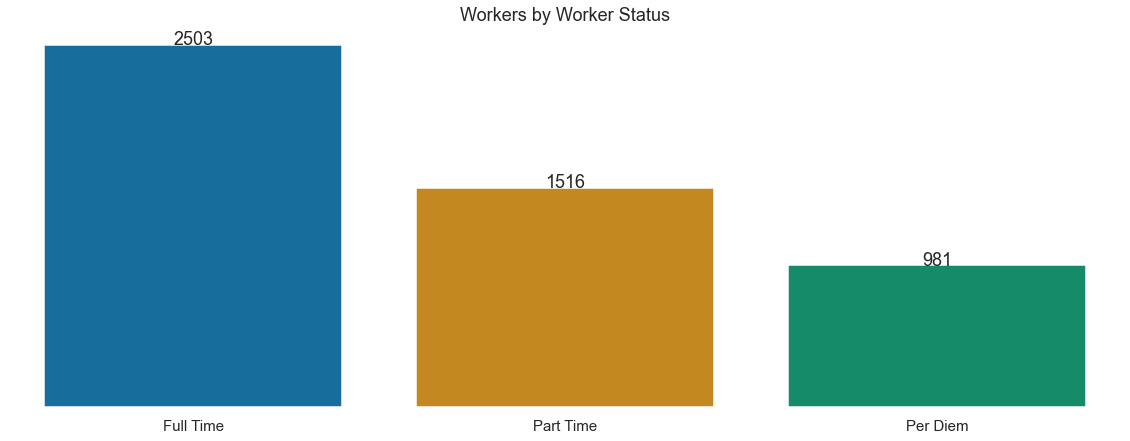

In [12]:
#visualize status feature
fig, ax = plt.subplots()
g = sns.countplot(x=worker_df['Worker Status'], order = worker_df['Worker Status'].value_counts().index, palette='colorblind')
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Workers by Worker Status')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Here we can see that a majority of workers are full time.  We have less workers that are categorized as part time and per diem.

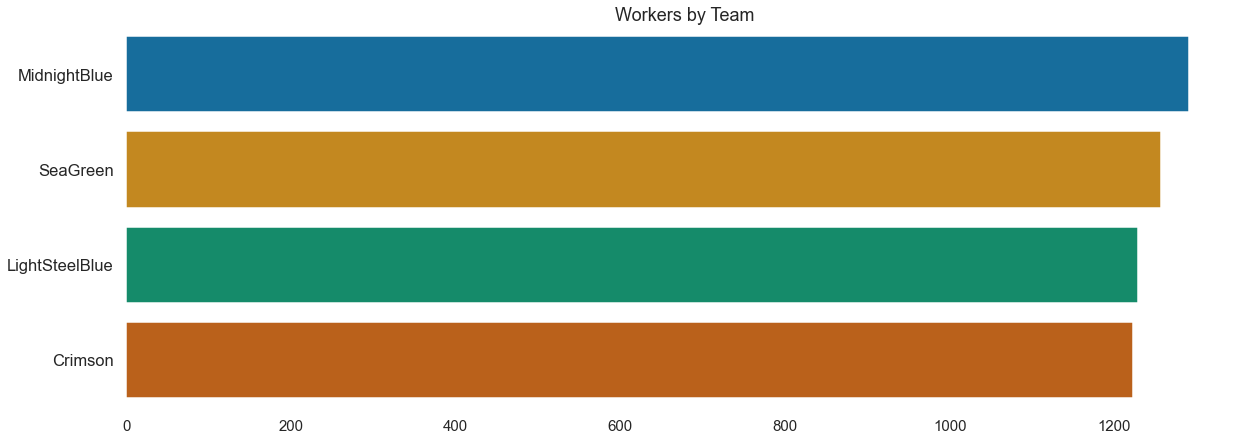

In [13]:
#visualize team feature
fig, ax = plt.subplots()
g = sns.countplot(y=worker_df['Team'], order = worker_df['Team'].value_counts().index, palette='colorblind')

plt.title('Workers by Team')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

It can also be helpful to start asking questions about the data.  Does one feature relate to another that we have?

Here we see that the teams are of similar sizes.  Midnight Blue has the most members and Crimson the least.  It could be interesting to explore how the teams are assigned.  Could it be based on job title, location, or worker status?

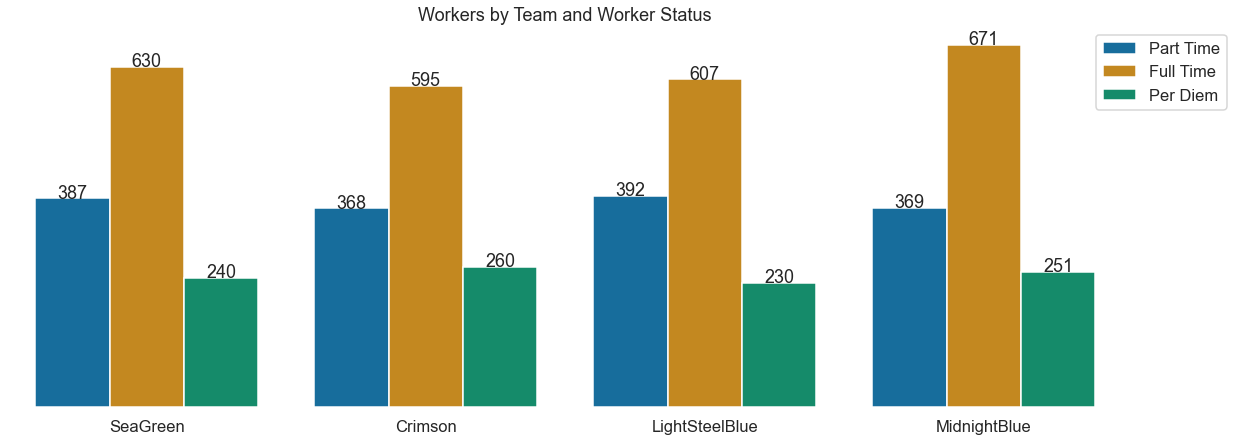

In [14]:
#visualize team by worker status
fig, ax = plt.subplots()
g = sns.countplot(x=worker_df['Team'], hue=worker_df['Worker Status'], palette='colorblind')
g.set_yticklabels([])

show_values_on_bars(ax)

# position the legend so that it doesn't cover any bard
leg = plt.legend( loc = 'upper right')
plt.draw() 
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
# Change location of the legend. 
xOffset = 0.1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

sns.despine(left=True, bottom=True)
plt.title('Workers by Team and Worker Status')
plt.ylabel('')
plt.xlabel('')
plt.show()

Here we can see there is a relatively equal distribution of workers to teams by worker status.  This suggests that workers are not assigned to teams by their status.

In [15]:
# read in widget data
widget_df = pd.read_csv('data/widgets.csv')
print(widget_df.shape)
widget_df.head()

(2817555, 5)


,Item Number,Step 1,Step 2,Step 3,Worker ID
0,4411865360-1000,0.635369,4.377276,2.734590,1000
1,4411865392-1000,2.047647,3.870909,12.698644,1000
2,4411865424-1000,0.870676,6.347963,7.655127,1000
3,4411865456-1000,2.938096,3.933764,3.550750,1000
4,4411865488-1000,2.951892,3.363985,3.820368,1000


In [16]:
# checking for null values
widget_df.isnull().sum()


Item Number    0
Step 1         0
Step 2         0
Step 3         0
Worker ID      0
dtype: int64

In [17]:
# statistics about numerical data
widget_df.describe()

,Step 1,Step 2,Step 3,Worker ID
count,2.817555e+06,2.817555e+06,2.817555e+06,2.817555e+06
mean,2.999583e+00,4.999611e+00,4.000098e+00,3.503214e+03
std,1.730051e+00,9.998504e-01,4.000131e+00,1.438283e+03
min,1.551238e-02,-1.133441e-01,4.070183e-07,1.000000e+03
25%,1.727544e+00,4.325530e+00,1.149915e+00,2.268000e+03
50%,2.674542e+00,4.999830e+00,2.770930e+00,3.501000e+03
75%,3.920415e+00,5.674386e+00,5.546493e+00,4.749000e+03
max,2.119987e+01,9.963565e+00,6.497195e+01,5.999000e+03


In [18]:
# checking column types
widget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817555 entries, 0 to 2817554
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Item Number  object 
 1   Step 1       float64
 2   Step 2       float64
 3   Step 3       float64
 4   Worker ID    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 107.5+ MB


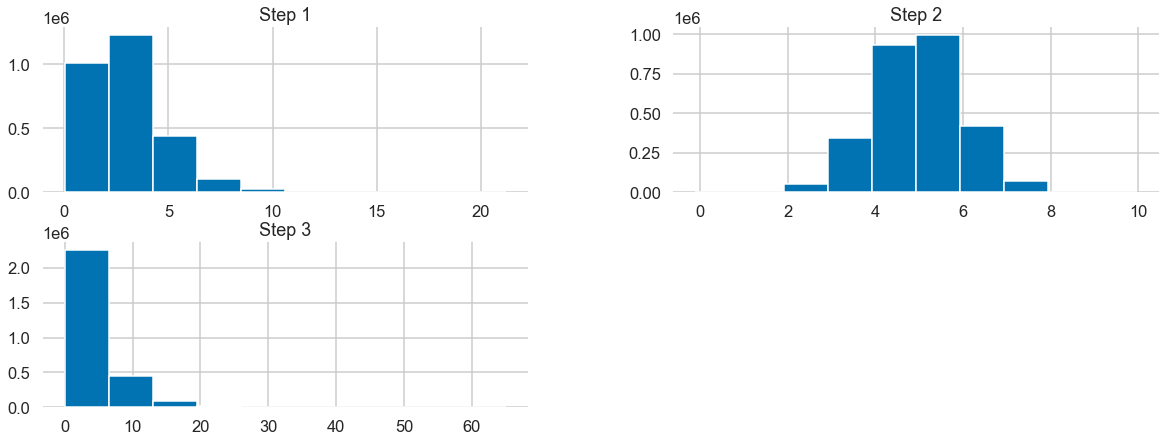

In [19]:
# create histograms of all numerical data
# we know worker id is an identity column so removing it from this visualization
widget_df_hist = widget_df[['Step 1', 'Step 2', 'Step 3']]

widget_df_hist.hist()
sns.despine(left=True, bottom=True)
plt.show()

Here we see histograms of each step in the widget making process.  For steps 1 and 3, it looks like a majority of workers complete the steps quickly and there are long tails where the task takes much longer to complete.  The long tails could be due to errors in recording the data, or due to workers having trouble completing the steps.  This would be interesting to explore further.

Step 2 appears to have a normal distribution.  Could step 2 be an easier to complete or more automated step in the widget making process?

In [20]:
# merge dataframes together
merged_df = pd.merge(worker_df, 
                     widget_df, 
                     how='inner', 
                     on='Worker ID')
print(merged_df.shape)
merged_df.head()

(2817555, 9)


,Worker ID,Worker Name,Hire Date,Worker Status,Team,Item Number,Step 1,Step 2,Step 3
0,1000,Paul Clark,2020-09-12,Part Time,SeaGreen,4411865360-1000,0.635369,4.377276,2.734590
1,1000,Paul Clark,2020-09-12,Part Time,SeaGreen,4411865392-1000,2.047647,3.870909,12.698644
2,1000,Paul Clark,2020-09-12,Part Time,SeaGreen,4411865424-1000,0.870676,6.347963,7.655127
3,1000,Paul Clark,2020-09-12,Part Time,SeaGreen,4411865456-1000,2.938096,3.933764,3.550750
4,1000,Paul Clark,2020-09-12,Part Time,SeaGreen,4411865488-1000,2.951892,3.363985,3.820368


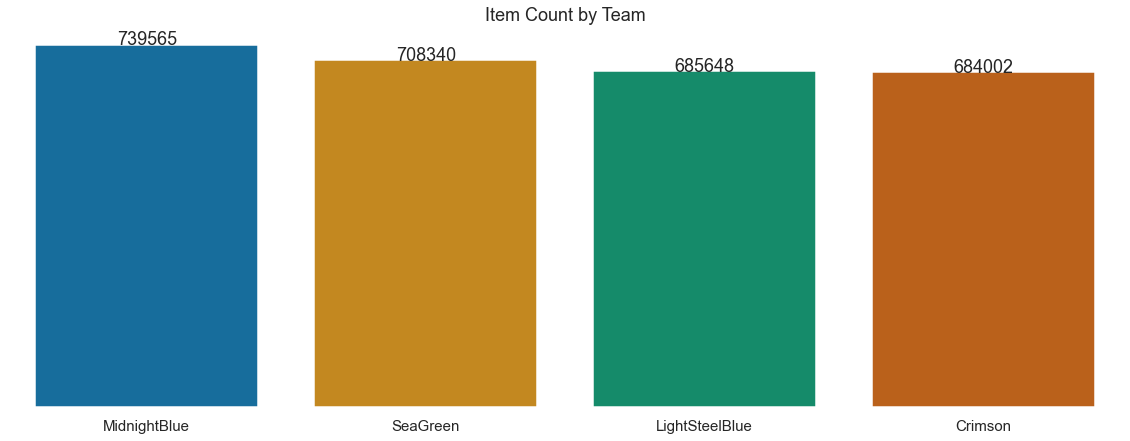

In [21]:
#visualize item count by team
fig, ax = plt.subplots()
g = sns.countplot(x=merged_df['Team'], 
                  order = merged_df['Team'].value_counts().index, 
                  palette='colorblind')
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Item Count by Team')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

The MidnightBlue team created the most items, while Crimson created the least.  We can infer this is related to the number of workers assigned to each team.  Above we found MidnightBlue is the largest team and Crimson the smallest.

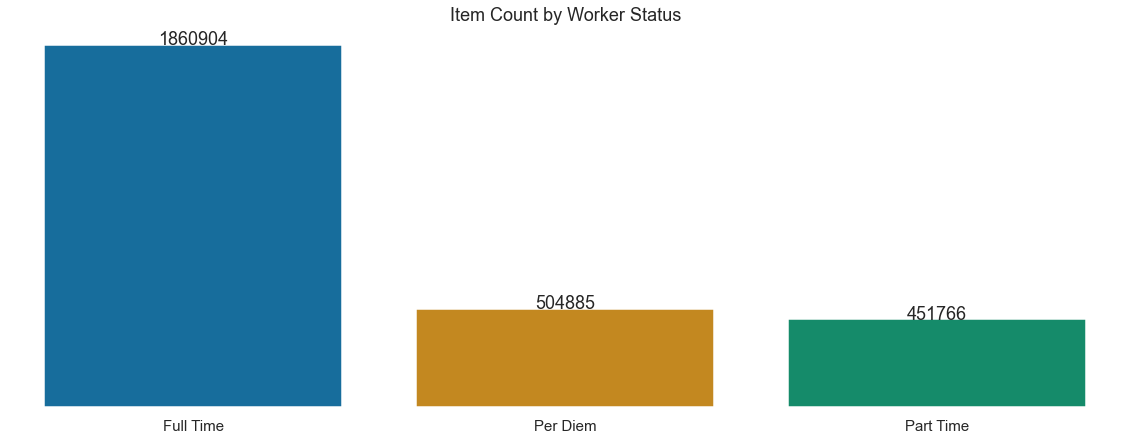

In [22]:
#visualize item count by worker
fig, ax = plt.subplots()
g = sns.countplot(x=merged_df['Worker Status'], 
                  order = merged_df['Worker Status'].value_counts().index, 
                  palette='colorblind')
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Item Count by Worker Status')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Here we see item count by worker status.  As expected, full time workers created the most items.

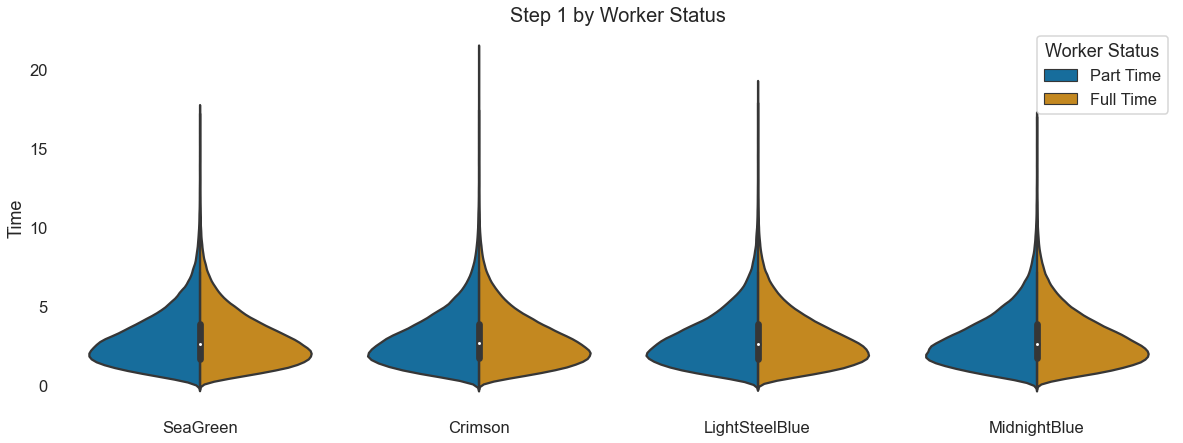

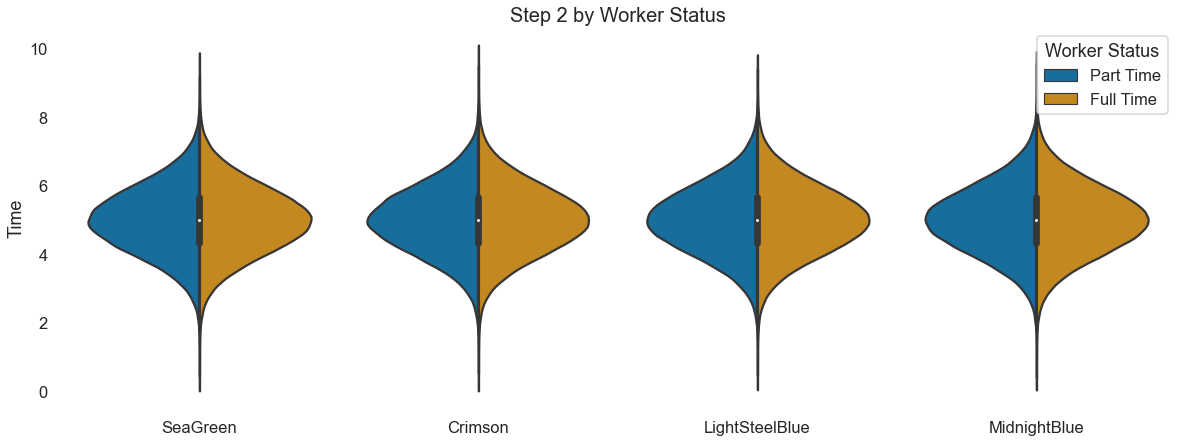

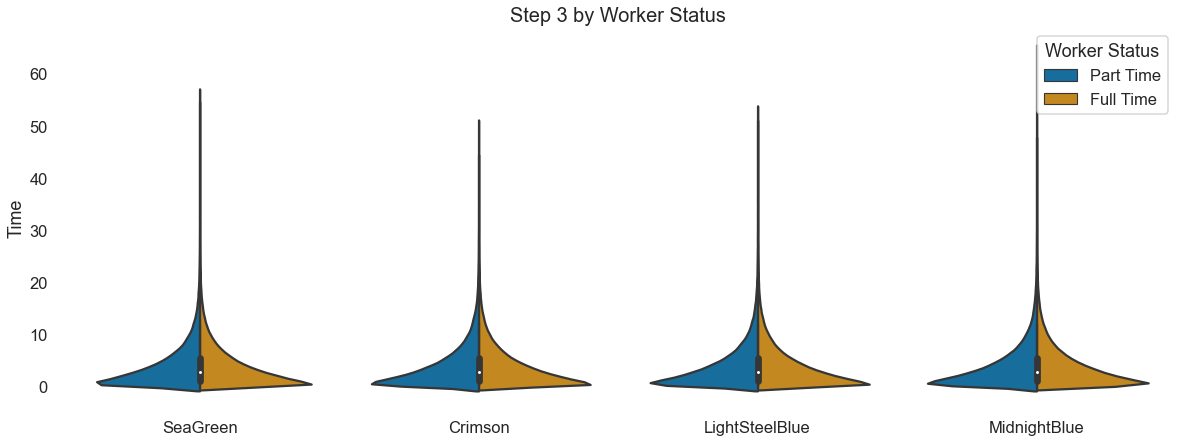

In [23]:
# create temp df with only part and full time
tmp = merged_df.loc[merged_df['Worker Status'].isin(
    ['Full Time','Part Time'])]

# list of steps to loop over
steps = ['Step 1', 'Step 2', 'Step 3']

# create a plot for each step
for step in steps:
    fig, ax = plt.subplots()
    g = sns.violinplot(x='Team', 
                   y=step, 
                   hue='Worker Status', 
                   split=True, data=tmp)

    sns.despine(left=True, bottom=True)
    plt.xlabel('')
    plt.ylabel('Time')

    plt.title(f'{step} by Worker Status', fontsize=20)

    plt.show()

### Conclusions
We found that the MidnightBlue team has the most workers and also created the greatest number of widgets. Crimson, with the least number of members, created the lowest number of widgets.

For the timeframe of this dataset it appears that number of widgets created is correlated with team members.
We also found that workers who created the least number of widgets are all per diem status. This suggests per diem workers could work less hours than part time and full time workers.

Full time and part time workers across all teams appear to be similar in their widget creation times.
### Limitations
The data given here does not include the time frame of the data collection period. We are only able to analyze the data as a single snapshot in time, and are not able to explore how widget creation may vary over time.

As we noted above, we do not know the time unit for the data in the widget table.

### Further Exploration
It would be interesting to explore widget creation over time. Do teams with the most workers always create the most widgets?

We could also further explore the timings of the widget creation steps. It would be interesting to see if this changes over time or to explore any potential outliers.